In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import statistics
import scanpy as sc
import matplotlib.pyplot as plt
from datetime import datetime

current_date = datetime.now()
formatted_date = current_date.strftime("%Y.%m.%d")

root = '/Users/grantongo/Desktop/nature methods/figures'

In [32]:
adata = sc.read(f"{root}/figure 4/data_pgmc_umap.h5ad")

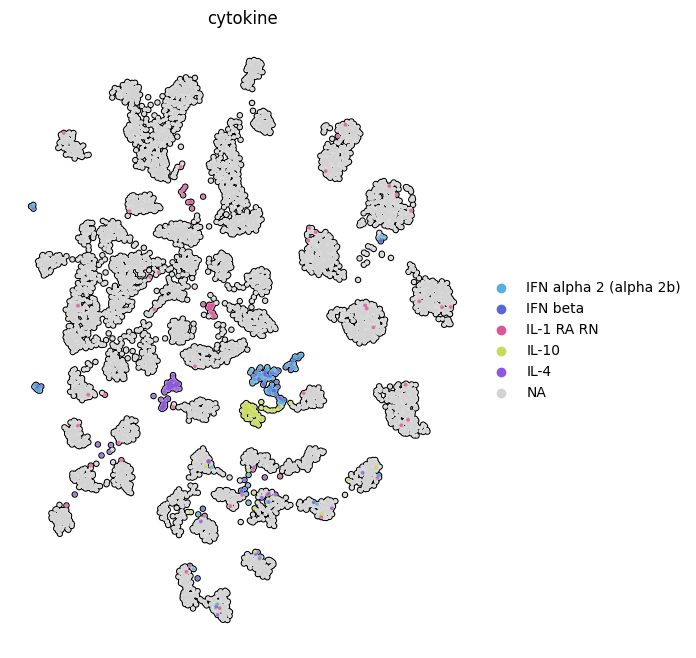

In [34]:
def umap_plot(adata, color, title, groups=None):
    
    if groups == None:
        palette = sbn.color_palette('hls',len(adata.obs[color].unique())+1)
    else:
        palette = sbn.color_palette('hls',11)
        
    fig, ax = plt.subplots(1,1, figsize=(6,8))
    
    ax = sc.pl.umap(adata, 
                    color=color, 
                    frameon=False, 
                    add_outline=True, 
                    legend_fontsize=10, 
                    groups=groups, 
                    title=title, 
                    alpha=0.8, 
                    palette = palette,
                    size=30,
                    legend_fontoutline=2, 
                    projection = '2d', 
                    ax=ax,
                    colorbar_loc=None, 
                    show=False)
    
    return fig

for variable in ['cytokine']: #['stimulus', 'donor', 'stimulus_concentration', 'cytokine']:
    
    if variable == 'cytokine': 
        groups = ['IFN alpha 2 (alpha 2b)','IFN beta','IL-1 RA RN','IL-4','IL-10']
    else: 
        groups = None
        
    fig = umap_plot(adata, color=variable, title=variable, groups=groups)
    fig.savefig(f'{root}/figure 4/svg_figure.4.b_umap.{variable}_{formatted_date}.svg')